* This notebook explores a multiclass classification task using Decision Tree, SVM and Feedforward neural network on the Ministry of Revenue Risk Management dataset, which consists of 29 attributes and over 4,000 records.

## Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC

## Loading the data

In [ ]:
df= pd.read_csv('/content/Risk-Data - Sheet1.csv')

In [ ]:
df.shape

(4787, 29)

In [ ]:
df.head()

,_c1_loss_declaration,_c2_capital_to_turnover,_c3_expense_to_turnover,_c4_turnover_to_vat_sales,_c5_audit_opinion,_c6_profit_margin,_c7_debt_to_turnover,_c8_inventory_to_turnover,_c9_exempt_sales_to_turnover,_c10_unusually_high_expenses,...,_c24_vat_import_purchase,_c25_vat_customs_export,_c27_liability_to_asset,_c28_asset_to_turnover,_c29_foreign_company,_c30_intelligence,last_audit_year,final_score,risk_score,risk_level
0,1,-3,3,3,0,1,3,0,3,3,...,3,3,2,3,-3,-3,3.0,33,4,High
1,3,3,3,-1,-2,-1,3,0,0,3,...,0,0,2,3,-3,3,2.0,24,3,High
2,3,-3,3,-1,-2,-1,3,3,0,0,...,3,0,3,3,-3,3,3.0,22,3,High
3,2,0,1,3,-2,0,1,0,0,3,...,0,0,2,0,-3,3,4.0,19,3,High
4,3,-1,3,3,-2,0,3,0,0,3,...,0,0,2,0,-3,-3,2.0,19,3,High


## Checking for missing values, If any? how many?

In [ ]:
df.isnull().sum()

_c1_loss_declaration               0
_c2_capital_to_turnover            0
_c3_expense_to_turnover            0
_c4_turnover_to_vat_sales          0
_c5_audit_opinion                  0
_c6_profit_margin                  0
_c7_debt_to_turnover               0
_c8_inventory_to_turnover          0
_c9_exempt_sales_to_turnover       0
_c10_unusually_high_expenses       0
_c11_interest_expense              0
_c12_license_fees                  0
_c13_foreign_technical             0
_c14_depreciation_expense          0
_c15_building_cost                 0
_c16_comp_mv_office                0
_c17_intengibles                   0
_c20_capital_gain                  0
_c22_vat_cit_sales                 0
_c24_vat_import_purchase           0
_c25_vat_customs_export            0
_c27_liability_to_asset            0
_c28_asset_to_turnover             0
_c29_foreign_company               0
_c30_intelligence                  0
last_audit_year                 3171
final_score                        0
r

## Drop the column with missing values (3171 rows are missing)

In [ ]:
df = df.drop(columns=['last_audit_year'])

## Converting categorical string values to numerical values

In [ ]:
risk_level_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df['risk_level'] = df['risk_level'].map(risk_level_mapping)

In [ ]:
df.head()

,_c1_loss_declaration,_c2_capital_to_turnover,_c3_expense_to_turnover,_c4_turnover_to_vat_sales,_c5_audit_opinion,_c6_profit_margin,_c7_debt_to_turnover,_c8_inventory_to_turnover,_c9_exempt_sales_to_turnover,_c10_unusually_high_expenses,...,_c22_vat_cit_sales,_c24_vat_import_purchase,_c25_vat_customs_export,_c27_liability_to_asset,_c28_asset_to_turnover,_c29_foreign_company,_c30_intelligence,final_score,risk_score,risk_level
0,1,-3,3,3,0,1,3,0,3,3,...,3,3,3,2,3,-3,-3,33,4,2
1,3,3,3,-1,-2,-1,3,0,0,3,...,3,0,0,2,3,-3,3,24,3,2
2,3,-3,3,-1,-2,-1,3,3,0,0,...,-1,3,0,3,3,-3,3,22,3,2
3,2,0,1,3,-2,0,1,0,0,3,...,3,0,0,2,0,-3,3,19,3,2
4,3,-1,3,3,-2,0,3,0,0,3,...,3,0,0,2,0,-3,-3,19,3,2


## Check the existence of outliers

In [ ]:
max_values = df.max()

# Get minimum values for each column
min_values = df.min()
print("Maximum values per column:")
print(max_values)

print("\nMinimum values per column:")
print(min_values)

Maximum values per column:
_c1_loss_declaration             3
_c2_capital_to_turnover          3
_c3_expense_to_turnover          3
_c4_turnover_to_vat_sales        3
_c5_audit_opinion                0
_c6_profit_margin                3
_c7_debt_to_turnover             3
_c8_inventory_to_turnover        3
_c9_exempt_sales_to_turnover     3
_c10_unusually_high_expenses     3
_c11_interest_expense            3
_c12_license_fees                3
_c13_foreign_technical           3
_c14_depreciation_expense        3
_c15_building_cost               3
_c16_comp_mv_office              3
_c17_intengibles                 3
_c20_capital_gain                3
_c22_vat_cit_sales               3
_c24_vat_import_purchase         3
_c25_vat_customs_export          3
_c27_liability_to_asset          3
_c28_asset_to_turnover           3
_c29_foreign_company            -3
_c30_intelligence                3
final_score                     33
risk_score                       4
risk_level                  

## Check data imbalance

<ipython-input-21-d91e6e82da6a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df,palette='Set1')


<Axes: xlabel='risk_level', ylabel='count'>

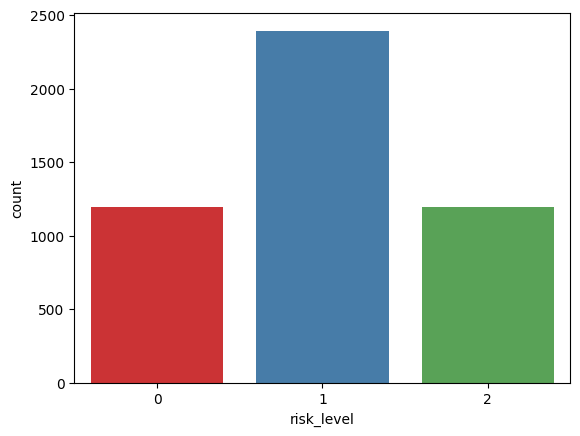

In [ ]:
sns.countplot(x='risk_level', data=df,palette='Set1')

## Check correlation

In [ ]:
import pandas as pd

corr_matrix = df.corr()
target_corr = corr_matrix['risk_level'].abs().sort_values(ascending=False)
print(target_corr)


risk_level                      1.000000
final_score                     0.909648
risk_score                      0.890778
_c24_vat_import_purchase        0.664693
_c25_vat_customs_export         0.663074
_c22_vat_cit_sales              0.634526
_c4_turnover_to_vat_sales       0.618091
_c16_comp_mv_office             0.530728
_c14_depreciation_expense       0.479829
_c1_loss_declaration            0.386819
_c10_unusually_high_expenses    0.366066
_c27_liability_to_asset         0.362268
_c7_debt_to_turnover            0.284462
_c3_expense_to_turnover         0.274851
_c30_intelligence               0.209076
_c12_license_fees               0.197152
_c8_inventory_to_turnover       0.188286
_c6_profit_margin               0.162555
_c20_capital_gain               0.102749
_c13_foreign_technical          0.100418
_c5_audit_opinion               0.098123
_c11_interest_expense           0.097311
_c2_capital_to_turnover         0.093883
_c15_building_cost              0.064935
_c17_intengibles

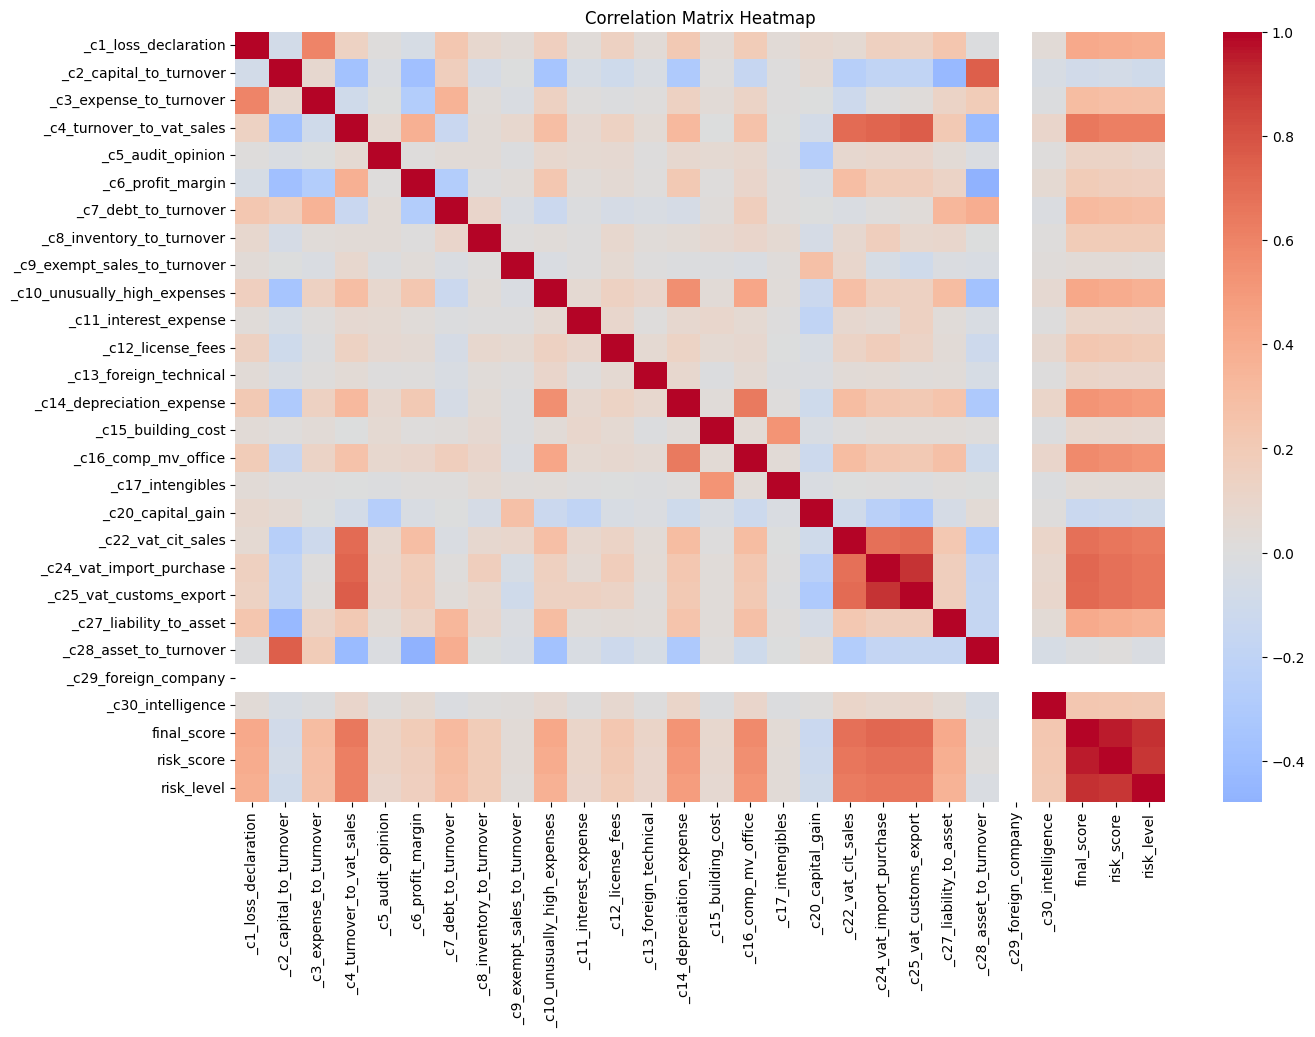

In [ ]:
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Checking if any of the columns have constant values throughout the dataset

In [ ]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

print("Columns with constant values:", constant_columns)

Columns with constant values: ['_c29_foreign_company']


## Separating the label from the rest of the data

* Removing features with data leakage (final score and risk score are derived attributes and they are not available at the time of prediction)
* Removing the feature that has a constant value throughout the dataset
* Removing the label from x

In [ ]:
x=df.drop(["risk_level","final_score","risk_score","_c29_foreign_company"], axis=1)
y=df["risk_level"]

In [ ]:
df.head()

,_c1_loss_declaration,_c2_capital_to_turnover,_c3_expense_to_turnover,_c4_turnover_to_vat_sales,_c5_audit_opinion,_c6_profit_margin,_c7_debt_to_turnover,_c8_inventory_to_turnover,_c9_exempt_sales_to_turnover,_c10_unusually_high_expenses,...,_c22_vat_cit_sales,_c24_vat_import_purchase,_c25_vat_customs_export,_c27_liability_to_asset,_c28_asset_to_turnover,_c29_foreign_company,_c30_intelligence,final_score,risk_score,risk_level
0,1,-3,3,3,0,1,3,0,3,3,...,3,3,3,2,3,-3,-3,33,4,2
1,3,3,3,-1,-2,-1,3,0,0,3,...,3,0,0,2,3,-3,3,24,3,2
2,3,-3,3,-1,-2,-1,3,3,0,0,...,-1,3,0,3,3,-3,3,22,3,2
3,2,0,1,3,-2,0,1,0,0,3,...,3,0,0,2,0,-3,3,19,3,2
4,3,-1,3,3,-2,0,3,0,0,3,...,3,0,0,2,0,-3,-3,19,3,2


In [ ]:
print(y.shape)
print(x.shape)

(4787,)
(4787, 24)


## Preparing the data for training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying SMOTE to balance the data

In [ ]:
from collections import Counter
counter=Counter(y_train)
y_train = y_train.astype(int)
print(counter)
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)
df= pd.DataFrame(x_train, columns=x_train.columns)
df['risk_level'] = y_train
counter=Counter(y_train)
print(counter)
df.to_csv('sampled.csv', index=False)

Counter({1: 1952, 0: 945, 2: 932})
Counter({2: 1952, 1: 1952, 0: 1952})


## Visualizing the data after balancing

/tmp/ipykernel_5697/2463429578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df,palette='Set1')


<Axes: xlabel='risk_level', ylabel='count'>

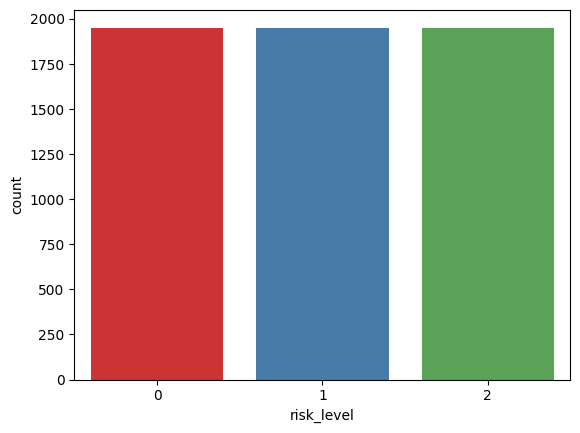

In [ ]:
sns.countplot(x='risk_level', data=df,palette='Set1')


# Hyperparameter Tuning

## Decision Tree

1. Using Grid Search

In [ ]:
model=DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 5, 7, 10],  # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None],  # None means all features
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


2. Using Random Search

In [ ]:
model= DecisionTreeClassifier()
param_dist = {
    'max_depth': [3, 5, 7, 10],  # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',  # Change based on your evaluation metric
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)
random_search.fit(x_train, y_train)

# Get the best parameters after fitting the model
best_params = random_search.best_params_
print(best_params)

{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}


In [ ]:
model = DecisionTreeClassifier(**best_params)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

## Evaluating the model after tuning

In [ ]:
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision}')
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall}')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Test Accuracy: 0.8496868475991649
Precision: 0.8518659693833707
Recall: 0.8559517824223707
F1 Score: 0.8537512370354786
[[229  23   0]
 [ 22 365  55]
 [  1  43 220]]


In [ ]:
y_train_pred = model.predict(x_train)
train_set_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_set_accuracy}")

Train Accuracy: 0.920594262295082


## SVM

1. Using grid search

In [ ]:
model=SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf','linear','poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


2. Using random search

In [ ]:
y_train_pred = model.predict(x_train)
train_set_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_set_accuracy}")

Train Accuracy: 0.9616087751371115


## Feed Forward Neural Network

In [ ]:
!export TF_ENABLE_ONEDNN_OPTS=0

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(26, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.3),  # To prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(set(y)), activation='softmax')  # Output layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4338 - loss: 1.4479 - val_accuracy: 0.5990 - val_loss: 0.7480
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.6211 - val_accuracy: 0.8387 - val_loss: 0.4802
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.4591 - val_accuracy: 0.8524 - val_loss: 0.4114
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 0.3852 - val_accuracy: 0.8763 - val_loss: 0.3633
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.3277 - val_accuracy: 0.8788 - val_loss: 0.3255
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8762 - loss: 0.3088 - val_accuracy: 0.9249 - val_loss: 0.2174
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8910 - loss: 0.2679 - val_accuracy: 0.9113 - val_loss: 0.2284
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8990 - loss: 0.2360 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9394 - loss: 0.1788 
Test Accuracy: 0.94


In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.0891
Train Accuracy: 0.95
